# 1. Importing the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_data = pd.read_csv('./combined_data.csv')

In [3]:
df_data.head()

,date,headlines,compound,positive,negative,neutral,open,close,high,low,change,volume,market_cap,label
0,2017-01-01,Colombia Declares Bitcoin and Other Digital Cu...,-0.3612,0.040,0.068,0.892,963.66,998.33,1003.08,958.70,3.60,147775008,16050407461,1
1,2017-01-02,Bitspark's George Harrap lists his takeaways f...,0.6298,0.079,0.026,0.895,998.62,1021.75,1031.39,996.70,2.32,222184992,16429024775,1
2,2017-01-03,State Street bank is on the verge of putting s...,0.8875,0.099,0.043,0.858,1021.60,1043.84,1044.08,1021.60,2.18,185168000,16786368910,1
3,2017-01-04,Charlie Shrem is re-imagining investment on th...,0.8847,0.074,0.032,0.895,1044.40,1154.73,1159.42,1044.40,10.56,344945984,18571869009,1
4,2017-01-05,Need a catch-up on recent price developments? ...,0.8248,0.056,0.007,0.936,1156.73,1013.38,1191.10,910.42,-12.39,510199008,16300254795,0


In [4]:
df_data.shape

(1128, 14)

# 2. Arrange the data

In [5]:
selected_features = ['close', 'open', 'high', 'low', 'volume', 'compound']

In [6]:
X = df_data[selected_features]
y = df_data['label']

In [7]:
X.head()

,close,open,high,low,volume,compound
0,998.33,963.66,1003.08,958.70,147775008,-0.3612
1,1021.75,998.62,1031.39,996.70,222184992,0.6298
2,1043.84,1021.60,1044.08,1021.60,185168000,0.8875
3,1154.73,1044.40,1159.42,1044.40,344945984,0.8847
4,1013.38,1156.73,1191.10,910.42,510199008,0.8248


In [8]:
y

0       1
1       1
2       1
3       1
4       0
       ..
1123    0
1124    1
1125    0
1126    1
1127    0
Name: label, Length: 1128, dtype: int64

# 2. Preprocessing

In [9]:
from sklearn import preprocessing

In [10]:
scaler_X = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X = np.array(X).reshape((len(X), len(selected_features)))
X = scaler_X.fit_transform(X)

In [11]:
X[0]

array([-0.97643438, -0.97984238, -0.98133781, -0.97772135, -0.99765376,
       -0.36921758])

# 3. Training and Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False, stratify = None)

In [14]:
X_train

array([[-0.97643438, -0.97984238, -0.98133781, -0.97772135, -0.99765376,
        -0.36921758],
       [-0.97393219, -0.97610347, -0.9783989 , -0.97354973, -0.99564529,
         0.63063109],
       [-0.9715721 , -0.97364579, -0.97708154, -0.97081622, -0.99664445,
         0.89063209],
       ...,
       [-0.5142225 , -0.52633335, -0.52263947, -0.51284036, -0.58314198,
         0.1912425 ],
       [-0.54200722, -0.51339581, -0.52963844, -0.53217033, -0.55477267,
        -0.90818746],
       [-0.53933088, -0.54161734, -0.55569097, -0.53891628, -0.6325208 ,
         0.37214347]])

### Write train and test datasets

In [15]:
np.savetxt('./train_and_test/X_train.txt', X_train, delimiter=',')
np.savetxt('./train_and_test/X_test.txt', X_test, delimiter=',')

In [16]:
np.savetxt('./train_and_test/y_train.txt', y_train.values, delimiter=',')
np.savetxt('./train_and_test/y_test.txt', y_test.values, delimiter=',')

### Resize the training set

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# 4. RNN LSTM Model

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras.models import model_from_json
from keras.models import load_model
from keras import regularizers

Using TensorFlow backend.


In [19]:
batch_size = 2048
nb_epoch = 2000
neurons = 25
dropout_ratio = 0.1

In [20]:
def create_model():
    model = Sequential() 
    model.add(LSTM(neurons, 
               return_sequences=True, 
               activation='tanh', 
               inner_activation='hard_sigmoid', 
               input_shape=(1, len(selected_features))
              )
         )
    model.add(Dropout(dropout_ratio))
    model.add(LSTM(neurons,
              return_sequences=True,
              activation='tanh'
              )
         )
    model.add(Dropout(dropout_ratio))
    model.add(LSTM(neurons, activation='tanh'))
    model.add(Dropout(dropout_ratio))
    model.add(Dense(activity_regularizer=regularizers.l1(0.00001), 
                output_dim=1, 
                activation='linear'
               )
         )
    model.add(Activation('sigmoid'))
    
    return model

In [21]:
model = create_model()

C:\Users\Mert\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(25, return_sequences=True, activation="tanh", input_shape=(1, 6), recurrent_activation="hard_sigmoid")`
  import sys
C:\Users\Mert\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activity_regularizer=<keras.reg..., activation="linear", units=1)`


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 25)             3200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [23]:
from keras.callbacks import Callback, EarlyStopping
from keras.utils import plot_model

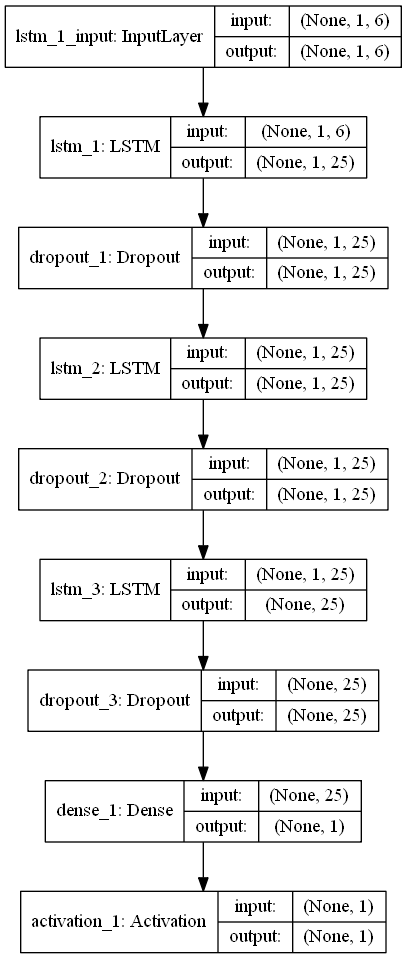

In [24]:
plot_model(model, show_shapes=True, to_file='model.png')

In [25]:
model.compile(loss='mean_squared_error' , optimizer='Adam',  metrics=['accuracy'])

In [26]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    verbose=False,
                    validation_split=0.2,
                    shuffle=True)

C:\Users\Mert\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


# 5. Model Evaluation

In [27]:
import matplotlib.pyplot as plt
# Plot data to see relationship in training and validation data
def plot_accuracy(hist):
    epoch_list=list(range(1, len(hist.history['accuracy']) + 1)) # values for x axis [1, 2, 3, 4, ..., # of epochs]
    plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
    plt.legend(('Training Accuracy', 'Validation Accuracy'))
    plt.show()

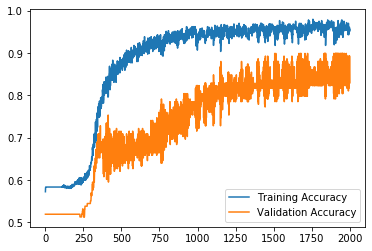

In [28]:
plot_accuracy(history)

In [29]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

339/339 [==============================] - 0s 18us/step
Test score: 0.07419178634881973
Test accuracy: 0.9203540086746216


In [30]:
## Import library to check other metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
predictions = model.predict(X_test, verbose=1)

339/339 [==============================] - 0s 658us/step


In [32]:
matrix = confusion_matrix(y_test, predictions.round())
print('confusion_matrix')
print(matrix)

confusion_matrix
[[167   1]
 [ 26 145]]


In [33]:
report = classification_report(y_test, predictions.round())
print(report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       168
           1       0.99      0.85      0.91       171

    accuracy                           0.92       339
   macro avg       0.93      0.92      0.92       339
weighted avg       0.93      0.92      0.92       339



# 6. Save the model

In [34]:
model.save('sentiment-lstm.h5')